In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from math import log10
from scipy import stats
import matplotlib
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from mongodata import mongodata
mongodata=mongodata.TAAPI(username='potsdam',password='sensors')

In [2]:
data=mongodata.concat(7006,20001,startTime='2021-07-06 15:30:00',endTime='2021-07-06 15:55:00')
data=mongodata.resample_concat(data,windowSize=60)

__________________________________________________________________________________________
 
All sensors are online!
 
2 devices returned
__________________________________________________________________________________________


In [3]:
df06=data[data['device_id']==7006]
df01=data[data['device_id']==20001]

In [4]:
pn03t_06=0.94
pn10t_06=1.19
pn50t_06=1.86
pn03b_06=0.85
pn10b_06=1.18
pn50b_06=2.12

pn03t_01=0.62
pn10t_01=0.83
pn50t_01=3.25
pn03b_01=1.6
pn10b_01=1.87
pn50b_01=4.86

df06['pn03_t']=df06['pn03_t']*pn03t_06
df06['pn10_t']=df06['pn10_t']*pn10t_06
df06['pn50_t']=df06['pn50_t']*pn50t_06
df06['pn03_b']=df06['pn03_b']*pn03b_06
df06['pn10_b']=df06['pn10_b']*pn10b_06
df06['pn50_b']=df06['pn50_b']*pn50b_06

df01['pn03_t']=df01['pn03_t']*pn03t_01
df01['pn10_t']=df01['pn10_t']*pn10t_01
df01['pn50_t']=df01['pn50_t']*pn50t_01
df01['pn03_b']=df01['pn03_b']*pn03b_01
df01['pn10_b']=df01['pn10_b']*pn10b_01
df01['pn50_b']=df01['pn50_b']*pn50b_01

In [5]:
data=pd.concat([df06,df01])

In [6]:
zone=2
df=data.copy()

df['mpn03um'] = np.where((df['pn03_t'] < zone*df['pn03_b']) & (df['pn03_b'] < zone*df['pn03_t']),
                                 (df['pn03_t']+df['pn03_b'])/2, (df[['pn03_t', 'pn03_b']]).min(axis=1))

df['mpn10um'] = np.where((df['pn10_t'] < zone*df['pn10_b']) & (df['pn10_b'] < zone*df['pn10_t']),
                                 (df['pn10_t']+df['pn10_b'])/2, (df[['pn10_t', 'pn10_b']]).min(axis=1))

df['mpn50um'] = np.where((df['pn50_t'] < zone*df['pn50_b']) & (df['pn50_b'] < zone*df['pn50_t']),
                                 (df['pn50_t']+df['pn50_b'])/2, (df[['pn50_t', 'pn50_b']]).min(axis=1))

df['small'] = df['mpn03um'] - df['mpn10um']
df['medium']= df['mpn10um']- df['mpn50um']
df['large']= df['mpn50um']
data=df.copy()





In [7]:
data['sr']=data['pn03_t']/data['pn03_b']
data['mr']=data['pn10_t']/data['pn10_b']
data['lr']=data['pn50_t']/data['pn50_b']
df06=data[data['device_id']==7006]
df01=data[data['device_id']==20001]

In [9]:
aps=pd.read_excel('/Users/nuerailikuerbanjiang/Downloads/DustTest5.4APS.xlsx')
aps=aps.T
aps=aps.rename(columns=aps.iloc[0])
aps=aps[1:]
aps=aps.reset_index()
aps= aps.iloc[:, 6:62]

cols = aps.columns.drop(['Start Time','Date'])
aps[cols] = aps[cols].apply(pd.to_numeric, errors='coerce')
aps['sum'] = aps[list(aps.columns)].sum(axis=1)
aps['small']= aps[list(aps.iloc[:, 5:14])].sum(axis=1)
aps['medium']= aps[list(aps.iloc[:, 14:36])].sum(axis=1)
aps['large']= aps[list(aps.iloc[:, 36:56])].sum(axis=1)

aps.loc[:,'Date'] = pd.to_datetime(aps.Date.astype(str)+' '+aps['Start Time'].astype(str))
aps['Date']=aps['Date'] + pd.to_timedelta(4, unit='m')




In [10]:
k=aps.iloc[:, 5:56]
k['Date']=aps['Start Time']
k=k.set_index('Date')
# k=k.T
# k.index = pd.to_numeric(k.index, errors='coerce')

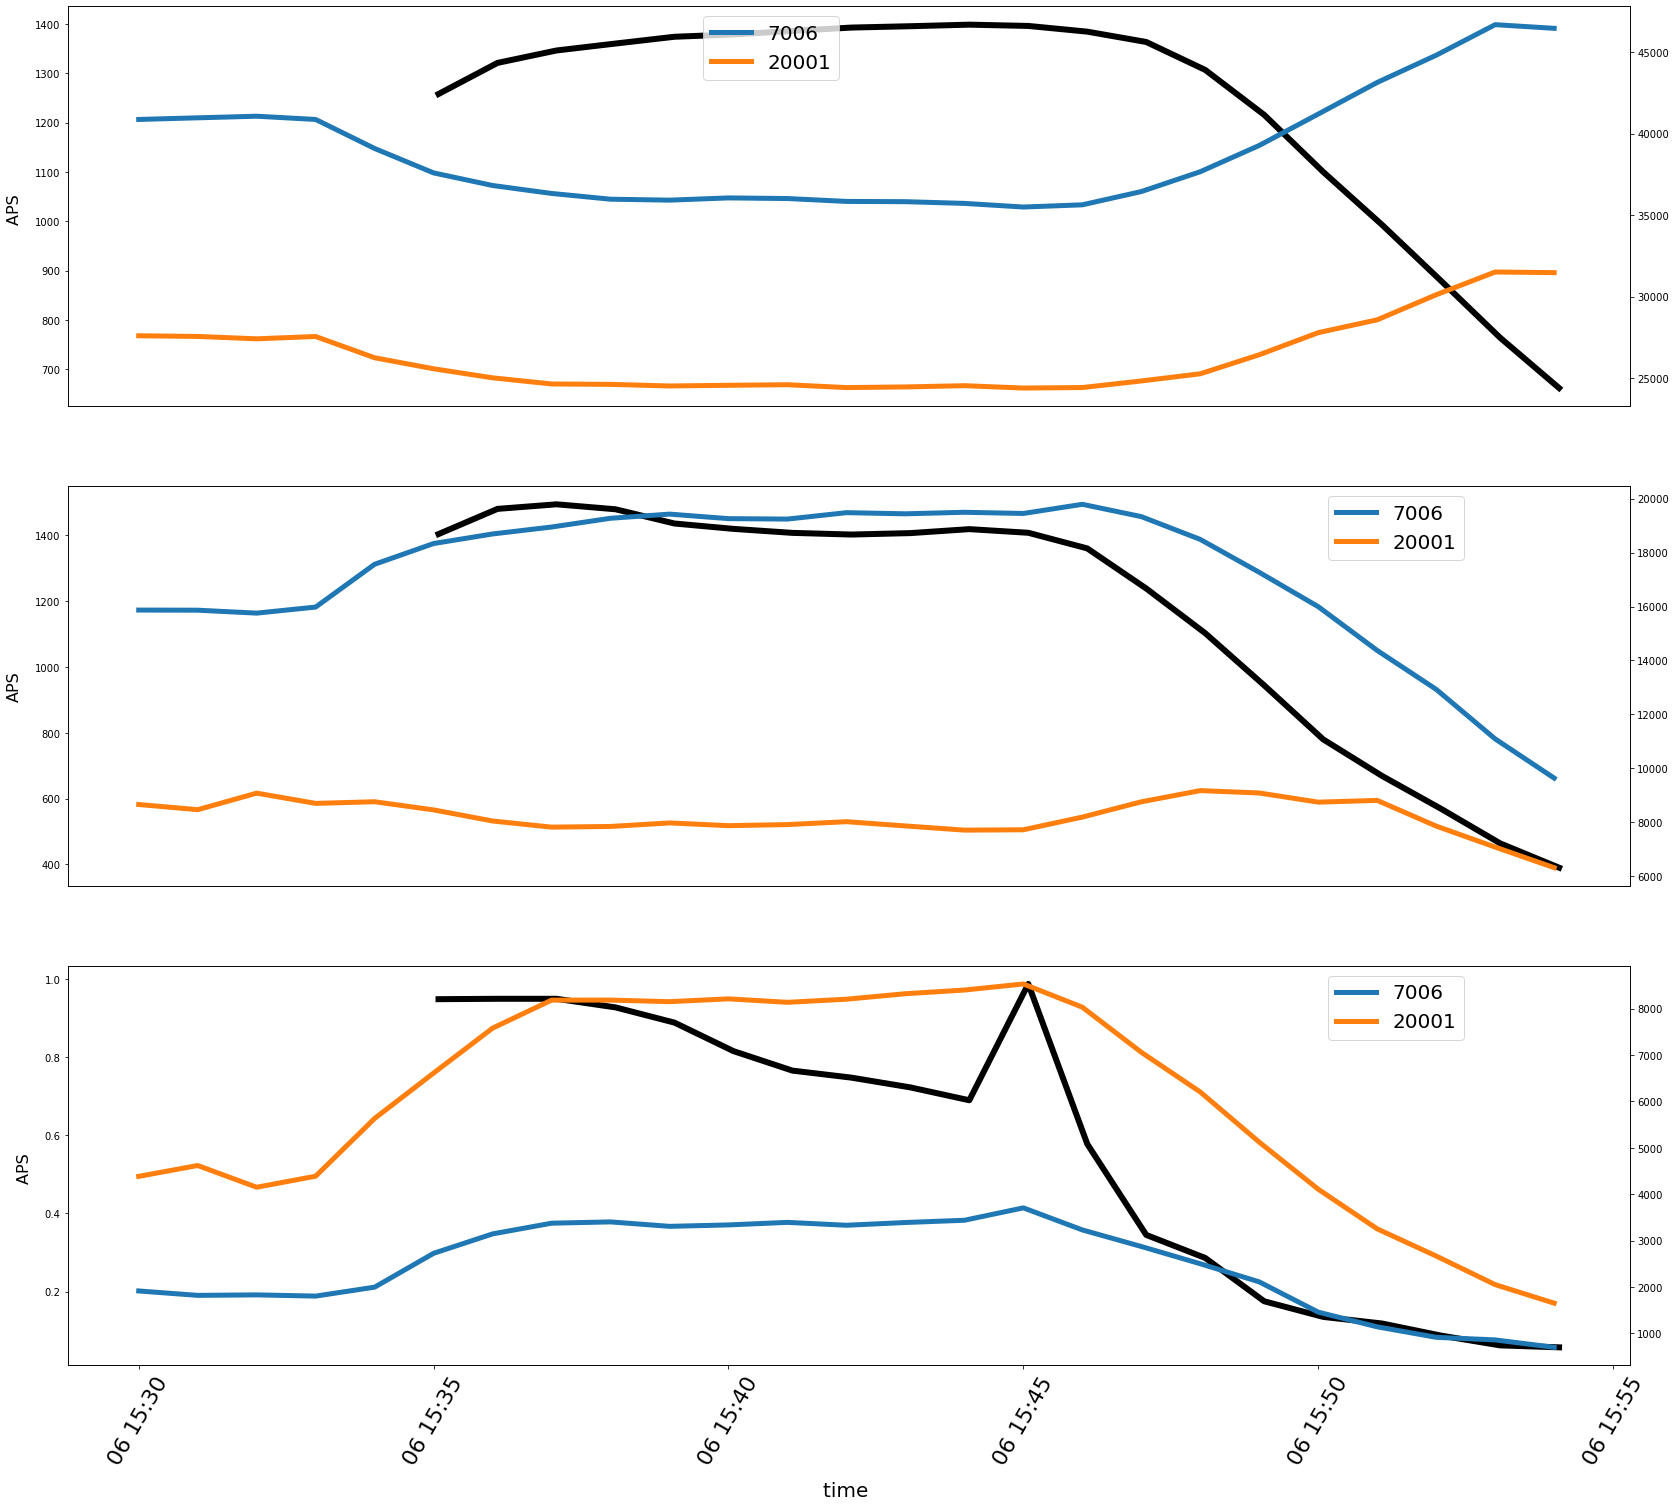

In [11]:

fig = plt.figure( figsize=(28, 25))

ax3 = fig.add_subplot(313)
ax1 = fig.add_subplot(311, sharex =ax3)
ax2 = fig.add_subplot(312, sharex =ax3)

ax1t = ax1.twinx()
ax2t = ax2.twinx()
ax3t = ax3.twinx()


ax1.plot(aps['Date'], aps['small'],  linewidth=6, color='k',label='small')
ax2.plot(aps['Date'], aps['medium'],  linewidth=6, color='k',label='medium')
ax3.plot(aps['Date'], aps['large'],  linewidth=6, color='k',label='large')



ax1t.plot(df06.Date, df06['small'], linewidth=5, label='7006')
ax1t.plot(df01.Date, df01['small'], linewidth=5, label='20001')


ax2t.plot(df06.Date, df06['medium'], linewidth=5, label='7006')
ax2t.plot(df01.Date, df01['medium'], linewidth=5, label='20001')


ax3t.plot(df06.Date, df06['large'], linewidth=5, label='7006')
ax3t.plot(df01.Date, df01['large'], linewidth=5, label='20001')




x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)



ax3.set_xlabel('time ',color='k',fontsize=20,labelpad=13)
ax1.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('APS',color='k',fontsize=16,labelpad=13)
ax3.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(60)
    label.set_fontsize(22)
    
ax1t.legend(bbox_to_anchor=(0.5, 1),loc='upper right', ncol=1, fontsize=20)
ax2t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
ax3t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)




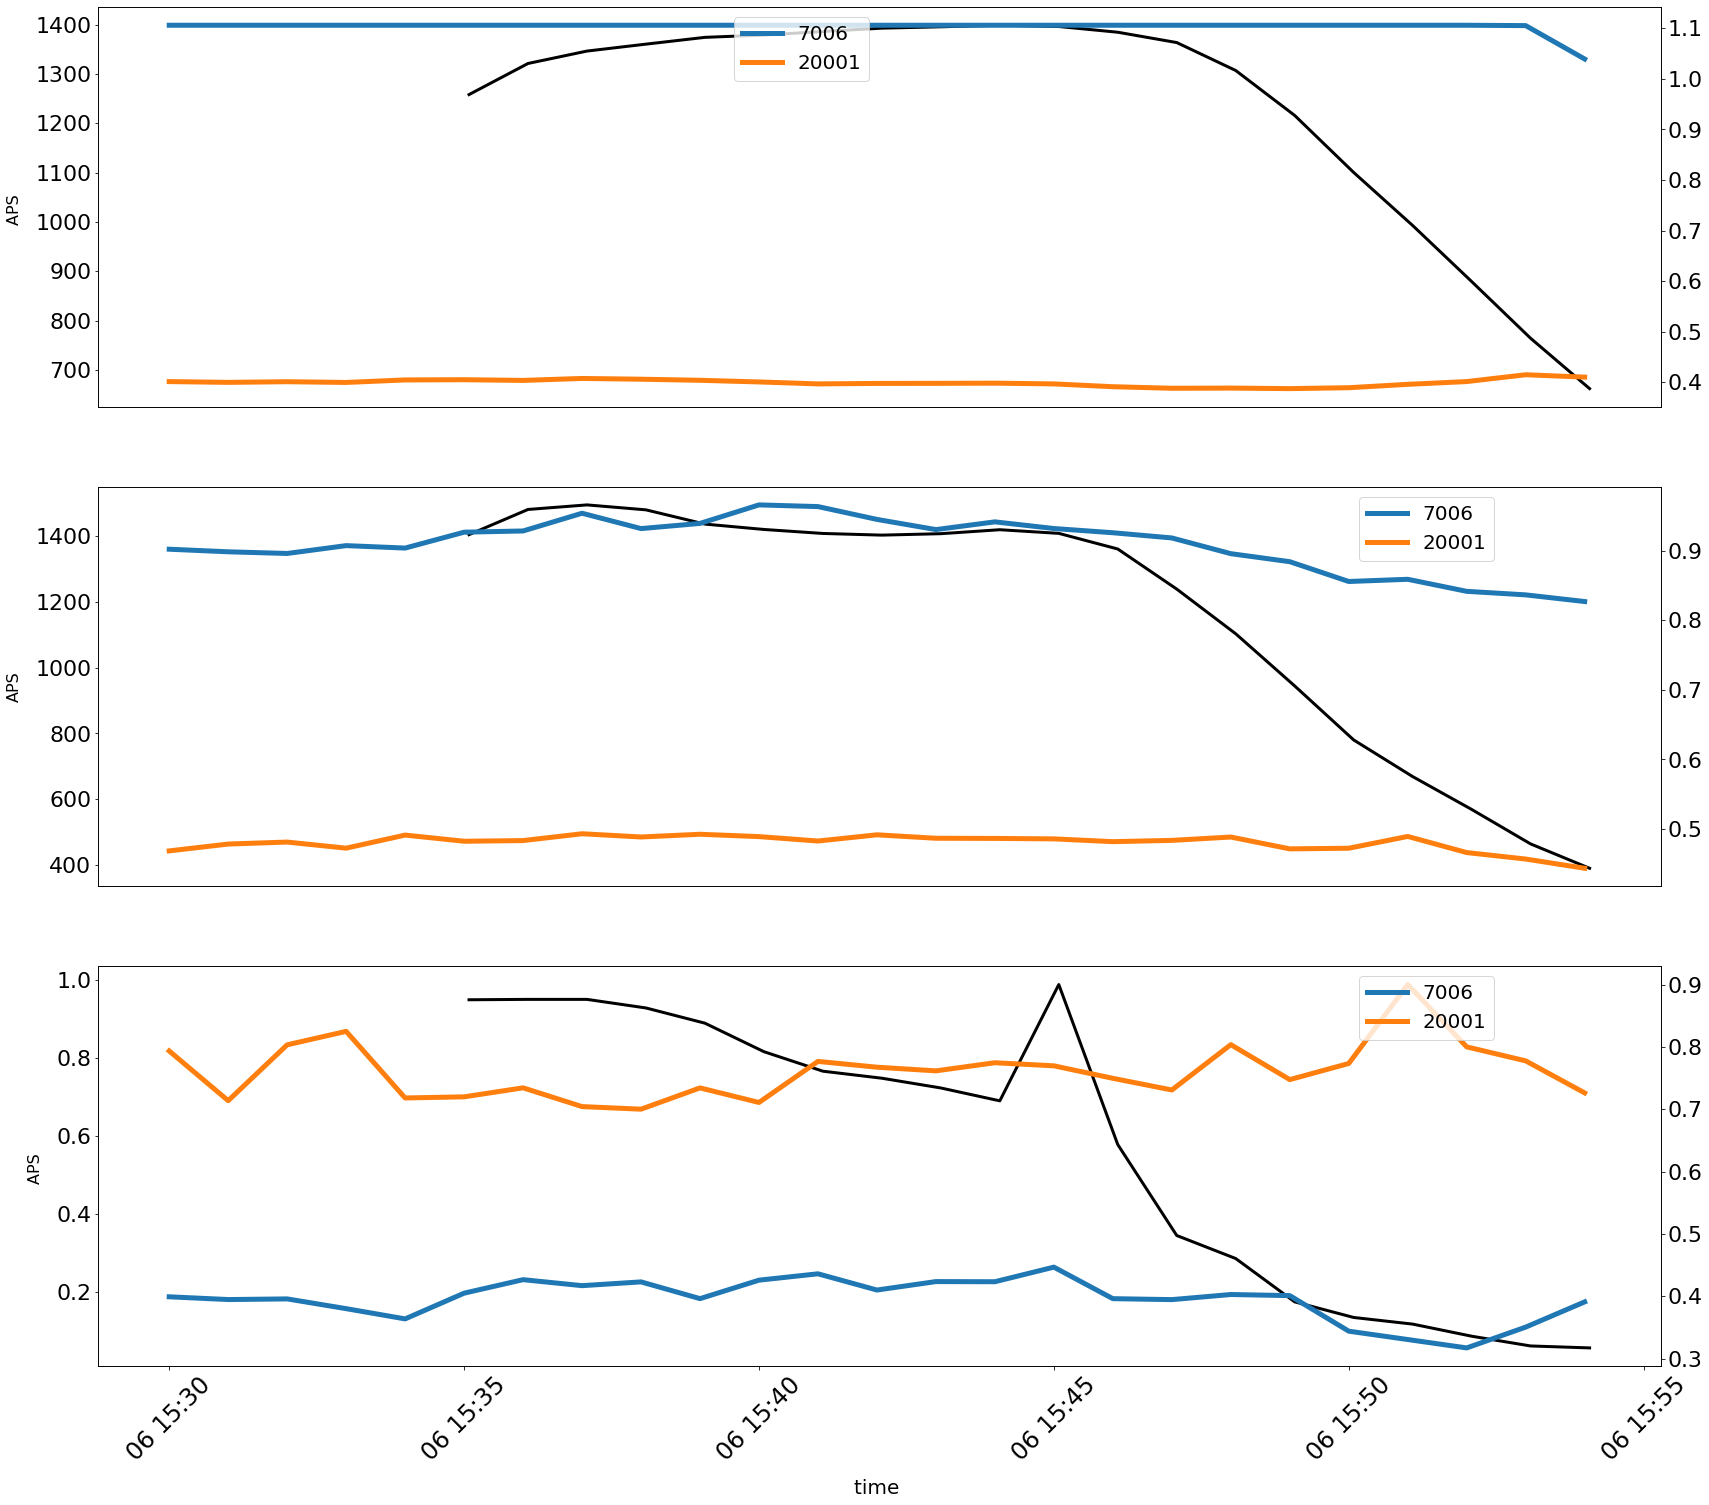

In [12]:




fig = plt.figure( figsize=(28, 25))

ax3 = fig.add_subplot(313)
ax1 = fig.add_subplot(311, sharex =ax3)
ax2 = fig.add_subplot(312, sharex =ax3)

ax1t = ax1.twinx()
ax2t = ax2.twinx()
ax3t = ax3.twinx()


ax1.plot(aps['Date'], aps['small'],  linewidth=3, color='k',label='small')
ax2.plot(aps['Date'], aps['medium'],  linewidth=3, color='k',label='medium')
ax3.plot(aps['Date'], aps['large'],  linewidth=3, color='k',label='large')



ax1t.plot(df06.Date, df06['sr'], linewidth=5, label='7006')
ax1t.plot(df01.Date, df01['sr'], linewidth=5, label='20001')


ax2t.plot(df06.Date, df06['mr'], linewidth=5, label='7006')
ax2t.plot(df01.Date, df01['mr'], linewidth=5, label='20001')


ax3t.plot(df06.Date, df06['lr'], linewidth=5, label='7006')
ax3t.plot(df01.Date, df01['lr'], linewidth=5, label='20001')




x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)



ax3.set_xlabel('time ',color='k',fontsize=20,labelpad=13)
ax1.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('APS',color='k',fontsize=16,labelpad=13)
ax3.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(24)
    
ax1t.legend(bbox_to_anchor=(0.5, 1),loc='upper right', ncol=1, fontsize=20)
ax2t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
ax3t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)



for label in ax1t.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax2t.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax3t.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax1.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax2.yaxis.get_majorticklabels():
    label.set_fontsize(22)
for label in ax3.yaxis.get_majorticklabels():
    label.set_fontsize(22)


